# Business Understanding

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

import subprocess
from datetime import datetime
import os
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Pramod\\Downloads\\eds\\notebooks'

# Data Understanding

In [3]:
# update data 

git_pull = subprocess.Popen( ["git", "pull",], 
                     cwd = os.path.dirname( "../data/raw/COVID-19" ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b'There is no tracking information for the current branch.\nPlease specify which branch you want to merge with.\nSee git-pull(1) for details.\n\n    git pull <remote> <branch>\n\nIf you wish to set tracking information for this branch you can do so with:\n\n    git branch --set-upstream-to=<remote>/<branch> master\n\n'
out : b''


In [4]:
# laod the data
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_data = pd.read_csv(data_path)

In [5]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815


In [6]:
# info of dataframe 
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 209 entries, Province/State to 8/13/20
dtypes: float64(2), int64(205), object(2)
memory usage: 434.4+ KB


 In the data, countries along with state/ regions are in rows, about 266 and coulmns from 4 th index represent date index.

In [99]:
# Analysis by each column
confirmed_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,6.970221e+04,7.072163e+04,7.179379e+04,7.284976e+04,7.382521e+04,7.466798e+04,7.552490e+04,7.648191e+04,7.752308e+04,7.859358e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,3.663507e+05,3.717968e+05,3.776103e+05,3.832573e+05,3.888225e+05,3.931864e+05,3.974736e+05,4.026421e+05,4.084648e+05,4.142108e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.745000e+02,2.797500e+02,2.797500e+02,3.017500e+02,3.032500e+02,3.100000e+02,3.217500e+02,3.225000e+02,3.367500e+02,3.445000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.981000e+03,2.041000e+03,2.064000e+03,2.080000e+03,2.093000e+03,2.096000e+03,2.102000e+03,2.127500e+03,2.131000e+03,2.131000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.072600e+04,2.114675e+04,2.153950e+04,2.202000e+04,2.250725e+04,2.293350e+04,2.352075e+04,2.411825e+04,2.490075e+04,2.583600e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,4.771080e+06,4.823890e+06,4.883582e+06,4.941755e+06,4.997929e+06,5.044864e+06,5.094400e+06,5.141208e+06,5.197411e+06,5.248854e+06


All column objects are in correct datatype. Furthur processing is not required

In [100]:
# null values
confirmed_data.isnull().any().sum()

1

In [101]:
confirmed_data.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
1/26/20           False
1/27/20           False
1/28/20           False
1/29/20           False
1/30/20           False
1/31/20           False
2/1/20            False
2/2/20            False
2/3/20            False
2/4/20            False
2/5/20            False
2/6/20            False
2/7/20            False
2/8/20            False
2/9/20            False
2/10/20           False
2/11/20           False
2/12/20           False
2/13/20           False
2/14/20           False
2/15/20           False
2/16/20           False
2/17/20           False
2/18/20           False
2/19/20           False
2/20/20           False
2/21/20           False
2/22/20           False
2/23/20           False
2/24/20           False
2/25/20           False
2/26/20           False
2/27/20           False
2/28/20         

State/ province column is not considered as important in the analysis and neglected. The state with NaN values can be written as 'No'. Lat and lon columns are not considered furthur.

In [111]:
# fill nan values as no
confirmed_data['Province/State']=confirmed_data['Province/State'].fillna('no')

In [102]:
# unique countries
print('There are about {} countries in the data'.format(len(confirmed_data['Country/Region'].unique())))

confirmed_data['Country/Region'].unique()

There are about 188 countries in the data


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

# Data Preparation

In [103]:
# date index
date_idx = confirmed_data.columns[4:]

main_df = pd.DataFrame( date_idx, columns= ['date'])

In [104]:
# countries list
country_list = ['Germany', 'India', 'US', 'Brazil', 'United Kingdom']

for country in country_list:
    main_df[country] = np.array(confirmed_data[confirmed_data['Country/Region'] == country].iloc[:, 4:].sum(axis=0))
    

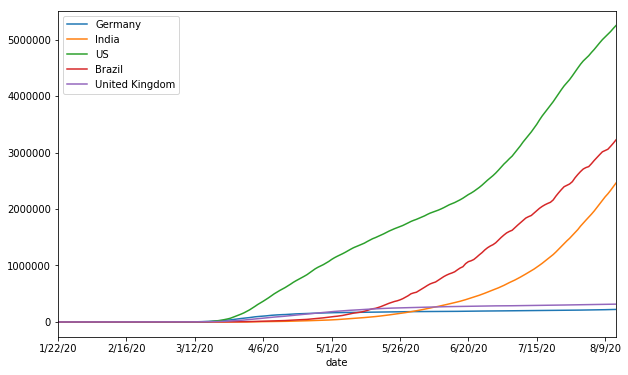

In [105]:
# plot 
main_df.set_index('date').plot(figsize = (10,6));

Fact is visualized, as in US, India, Brazil cases are increasing rapidly where Germany doesnot have rapid increase rate

In [106]:
# datetime strip
date_idx = [datetime.strptime(each, '%m/%d/%y') for each in main_df.date]

In [107]:
main_df['date'] = date_idx

In [108]:
main_df.tail()

,date,Germany,India,US,Brazil,United Kingdom
200,2020-08-09,217288,2215074,5044864,3035422,312574
201,2020-08-10,218508,2268675,5094400,3057470,313392
202,2020-08-11,219540,2329638,5141208,3109630,314542
203,2020-08-12,220859,2396637,5197411,3164785,315581
204,2020-08-13,222281,2461190,5248854,3224876,315600


In [109]:
# save the file in processed folder
main_df.to_csv('../data/processed/COVID_small_table_confirmed.csv', sep=';', index=False)